<a href="https://colab.research.google.com/github/wonively523/Hands-On-Meta-Learning-With-Python/blob/master/Assignment04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive 
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [0]:
import csv
import numpy as np

In [81]:
train = {'x':[],'y':[],'z':[],'h':[]}
with open('/content/gdrive/My Drive/Colab Notebooks/data_train.csv', newline='') as myfile:
    reader  = csv.reader(myfile, delimiter=',')
    ct = 1 
    for i in reader:
        print('[', ct, ']', 'x =', i[0], ', y = ', i[1], ', z = ', i[2], ', h = ', i[3])
        ct += 1
        train['x'].append(float(i[0]))
        train['y'].append(float(i[1]))
        train['z'].append(float(i[2]))
        train['h'].append(float(i[3]))


[ 1 ] x = 0.27354771453665605 , y =  -8.932101598046074 , z =  18.70868394492699 , h =  73.57882491359598
[ 2 ] x = 5.403327323126673 , y =  4.782976500936417 , z =  -18.76220985503919 , h =  -56.41043333872962
[ 3 ] x = 0.029941312523676267 , y =  -3.2459156984821025 , z =  6.9324982114247895 , h =  52.39076824816363
[ 4 ] x = 3.047974457680872 , y =  0.7152107112924928 , z =  -1.9654187170206976 , h =  -6.936295282007531
[ 5 ] x = 1.3020743188547064 , y =  -5.871807382211632 , z =  -15.702181352019878 , h =  -34.99701707942456
[ 6 ] x = 0.48067768765626884 , y =  -2.9117619875044713 , z =  -2.3631235358529112 , h =  -19.85473503546304
[ 7 ] x = 1.6315020736136816 , y =  9.399052248888598 , z =  2.47547991106324 , h =  4.6693089029172725
[ 8 ] x = 6.373997103111523 , y =  16.58421457152967 , z =  17.896253239300936 , h =  20.327296910572635
[ 9 ] x = 7.003140610383589 , y =  17.425389177900183 , z =  -11.921952696244727 , h =  -96.11724036189486
[ 10 ] x = 11.816393974825985 , y =  10

In [82]:
test = {'x':[],'y':[],'z':[],'h':[]}
with open('/content/gdrive/My Drive/Colab Notebooks/data_train.csv', newline='') as myfile:
    reader  = csv.reader(myfile, delimiter=',')
    ct = 1 
    for i in reader:
        print('[', ct, ']', 'x =', i[0], ', y = ', i[1], ', z = ', i[2], ', h = ', i[3])
        ct += 1
        test['x'].append(float(i[0]))
        test['y'].append(float(i[1]))
        test['z'].append(float(i[2]))
        test['h'].append(float(i[3]))

[ 1 ] x = 0.27354771453665605 , y =  -8.932101598046074 , z =  18.70868394492699 , h =  73.57882491359598
[ 2 ] x = 5.403327323126673 , y =  4.782976500936417 , z =  -18.76220985503919 , h =  -56.41043333872962
[ 3 ] x = 0.029941312523676267 , y =  -3.2459156984821025 , z =  6.9324982114247895 , h =  52.39076824816363
[ 4 ] x = 3.047974457680872 , y =  0.7152107112924928 , z =  -1.9654187170206976 , h =  -6.936295282007531
[ 5 ] x = 1.3020743188547064 , y =  -5.871807382211632 , z =  -15.702181352019878 , h =  -34.99701707942456
[ 6 ] x = 0.48067768765626884 , y =  -2.9117619875044713 , z =  -2.3631235358529112 , h =  -19.85473503546304
[ 7 ] x = 1.6315020736136816 , y =  9.399052248888598 , z =  2.47547991106324 , h =  4.6693089029172725
[ 8 ] x = 6.373997103111523 , y =  16.58421457152967 , z =  17.896253239300936 , h =  20.327296910572635
[ 9 ] x = 7.003140610383589 , y =  17.425389177900183 , z =  -11.921952696244727 , h =  -96.11724036189486
[ 10 ] x = 11.816393974825985 , y =  10

In [0]:
m = len(train['x'])

def gradient_descent(pred, y):
  j = (1/(2*m))*np.sum(np.square(pred-y))
  D_theta0 = (1/m)*np.sum(pred-y)
  D_theta1 = (1/m)*np.sum(np.multiply((pred-y),train['x']))
  D_theta2 = (1/m)*np.sum(np.multiply((pred-y),train['y']))
  D_theta3 = (1/m)*np.sum(np.multiply((pred-y),train['z']))

  return j, D_theta0, D_theta1, D_theta2, D_theta3

In [0]:
def update(lr, D_theta0, D_theta1, D_theta2, D_theta3):
  theta0 = theta_history['theta0'][-1]
  theta1 = theta_history['theta1'][-1]
  theta2 = theta_history['theta2'][-1]
  theta3 = theta_history['theta3'][-1]

  theta0 = theta0-lr*D_theta0
  theta1 = theta1-lr*D_theta1
  theta2 = theta2-lr*D_theta2
  theta3 = theta3-lr*D_theta3

  return theta0, theta1, theta2, theta3

In [0]:
import matplotlib.pyplot as  plt
%matplotlib inline

plt.style.use(['ggplot'])

In [0]:
def plot_param(theta_history):
  
  plt.figure(figsize=(12, 8))
  
  theta0 = theta_history['theta0']
  theta1 = theta_history['theta1']
  theta2 = theta_history['theta2']
  theta3 = theta_history['theta3']

  plt.plot(theta0,'black')
  plt.plot(theta1,'red')
  plt.plot(theta2,'green')
  plt.plot(theta3,'blue')

  plt.show()

In [0]:
def plot_error(data,j_history):
 
  cost = j_history['j'] 
  plt.figure(figsize=(12, 8))
  plt.plot(cost,'blue')
  plt.show()

In [0]:
theta_history = {}
theta_history['theta0'] = list()
theta_history['theta1'] = list()
theta_history['theta2'] = list()
theta_history['theta3'] = list()

j_history={}
j_history['j'] =list()


In [0]:
def history_theta(theta0, theta1, theta2, theta3):
  theta_history['theta0'].append(theta0)
  theta_history['theta1'].append(theta1)
  theta_history['theta2'].append(theta2)
  theta_history['theta3'].append(theta3)

In [0]:
def history_j(cost):
  j_history['j'].append(cost)  

In [0]:
def init():
  theta0 = -50
  theta1 = -5
  theta2 = 10
  theta3 = 5
  return theta0, theta1, theta2, theta3

In [0]:
def pred(theta_history):
  #print(record_dict['theta_zero'][-1])
  pred_h = theta_history['theta0'][-1] + np.multiply(theta_history['theta1'][-1],train['x']) + np.multiply(theta_history['theta2'][-1],train['y'])+np.multiply(theta_history['theta3'][-1],train['z'])
  return pred_h


In [0]:
def train_(iters=1000):
  data = 'train'
  lr = 0.01

  theta0, theta1, theta2, theta3 = init() 
  history_theta(theta0, theta1, theta2, theta3) #record the parameters
  
  for iter in range(iters):
    prediction = pred(theta_history)
    j, D_theta0, D_theta1, D_theta2, D_theta3 = gradient_descent(prediction,train['h'])
    history_j(j)

    theta0, theta1, theta2, theta3 = update(lr, D_theta0, D_theta1, D_theta2, D_theta3)
    history_theta(theta0, theta1, theta2, theta3)
    
    test_() #per iteration test
  plot_error(data,j_history)
  plot_param(theta_history) 

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in square
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in square
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in add
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in add
  This is separate from the ipykernel package so we can avoid doing imports until


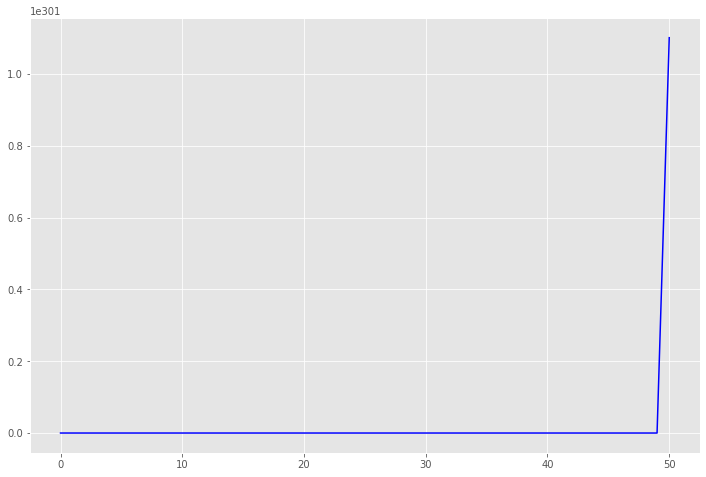

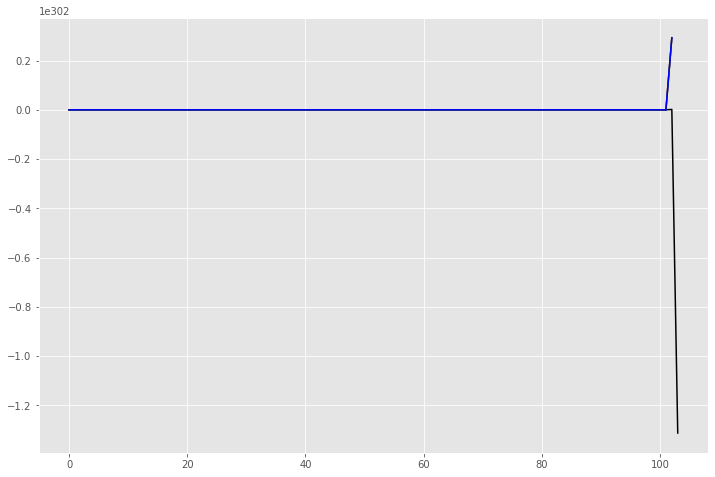

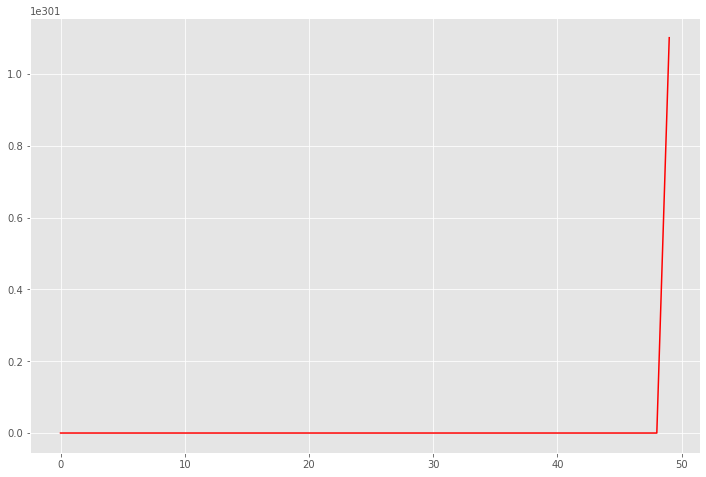

In [94]:
test_j=[]

def test_():

  mode='test'
  pred_h = theta_history['theta0'][-1] +np.multiply(theta_history['theta1'][-1],test['x']) +np.multiply(theta_history['theta2'][-1],test['y'])+np.multiply(theta_history['theta3'][-1],test['z'])
  j = (1/(2*m))*np.sum(np.square(pred_h - test['h']))

  test_j.append(j)

 
train_()
#test plot
plt.figure(figsize=(12, 8))
plt.plot(test_j,'red') 
plt.show()
